In [ ]:
## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi
 

## I. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heart1.csv', 'Heart_disease_prediction.ipynb', 'myenv']


## II. Importing and understanding our dataset 

In [3]:
dataset = pd.read_csv("heart1.csv")

#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(1025, 14)

#### Printing out a few columns

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
226,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
741,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
735,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1


#### Description

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [12]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([0, 1])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [15]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    526
0    499
Name: count, dtype: int64


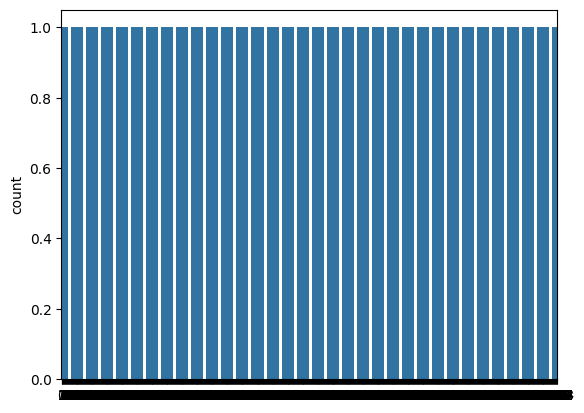

In [16]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [17]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [18]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

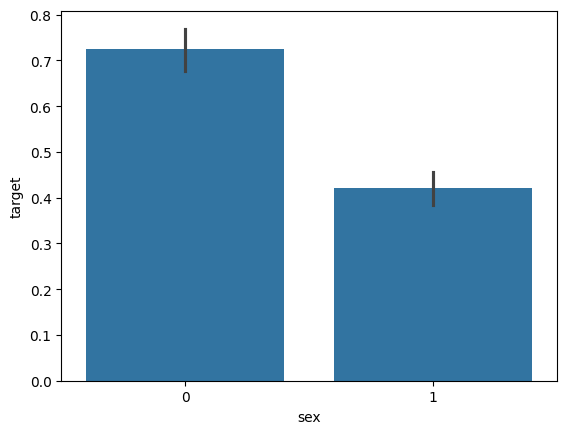

In [19]:
sns.barplot(x=dataset["sex"], y=y)


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [20]:
dataset["cp"].unique()

array([0, 1, 2, 3])

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

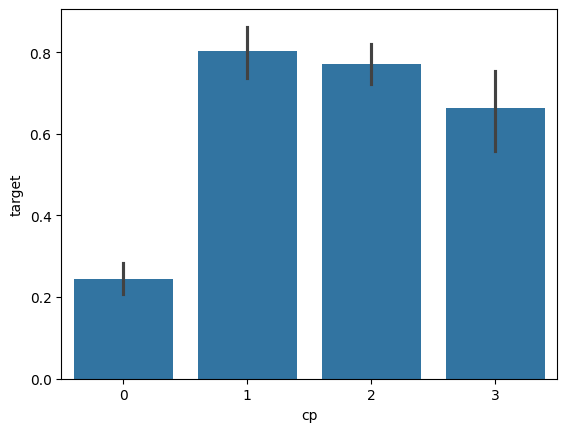

In [21]:
sns.barplot(x="cp", y=y, data=dataset)


##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [22]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [23]:
dataset["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

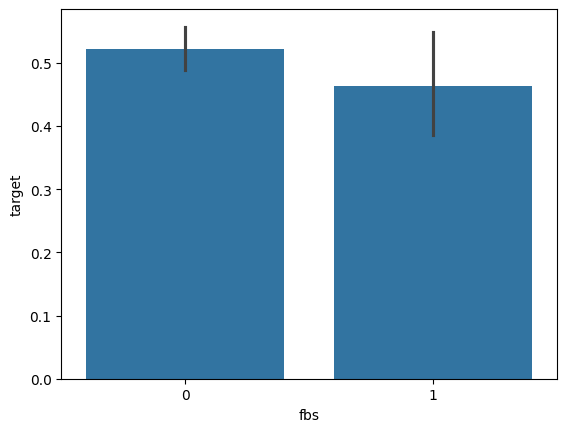

In [24]:
sns.barplot(x=dataset["fbs"], y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [25]:
dataset["restecg"].unique()

array([1, 0, 2])

<Axes: xlabel='restecg', ylabel='target'>

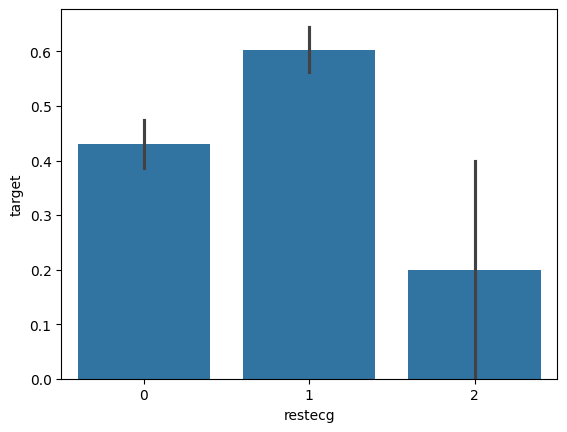

In [26]:
sns.barplot(x=dataset["restecg"], y=y)


##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [27]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

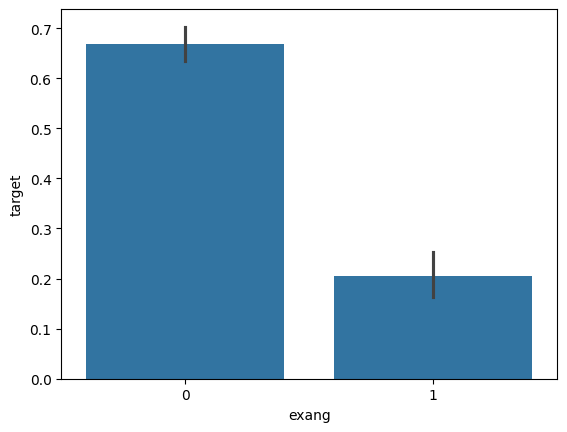

In [28]:
sns.barplot(x=dataset["exang"], y=y)


##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [29]:
dataset["slope"].unique()

array([2, 0, 1])

<Axes: xlabel='slope', ylabel='target'>

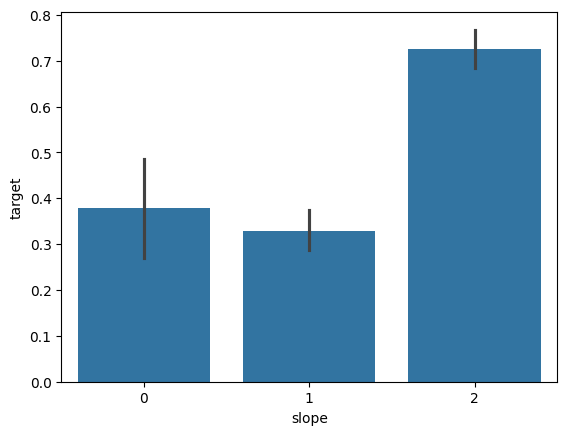

In [30]:
sns.barplot(x=dataset["slope"], y=y)


##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [31]:
#number of major vessels (0-3) colored by flourosopy

In [32]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

<Axes: ylabel='count'>

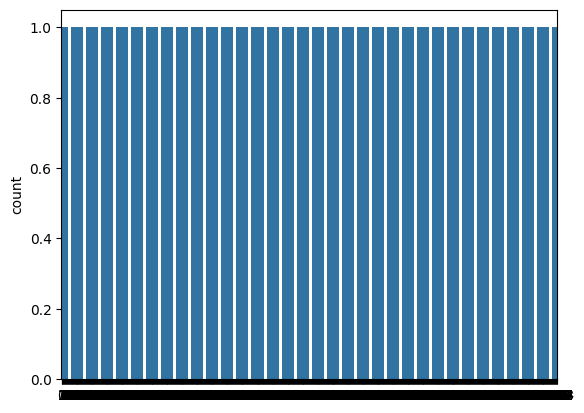

In [33]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

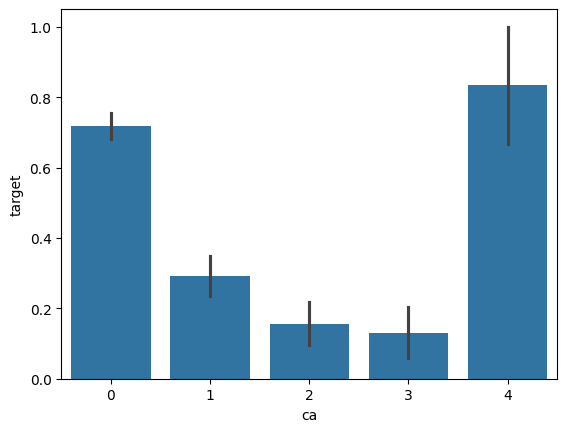

In [34]:
sns.barplot(x=dataset["ca"], y=y)


##### ca=4 has astonishingly large number of heart patients

In [35]:
### Analysing the 'thal' feature

In [36]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

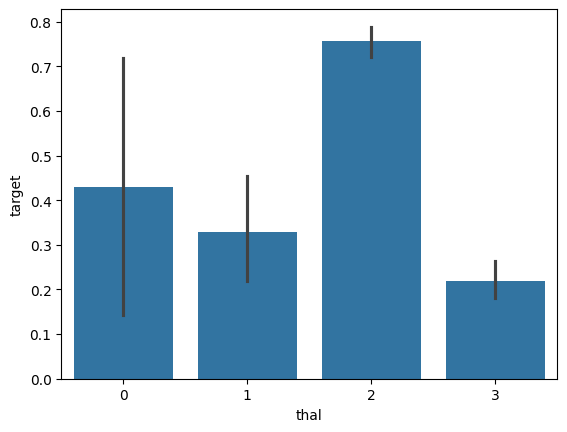

In [37]:
sns.barplot(x=dataset["thal"], y=y)


<Axes: xlabel='thal', ylabel='Density'>

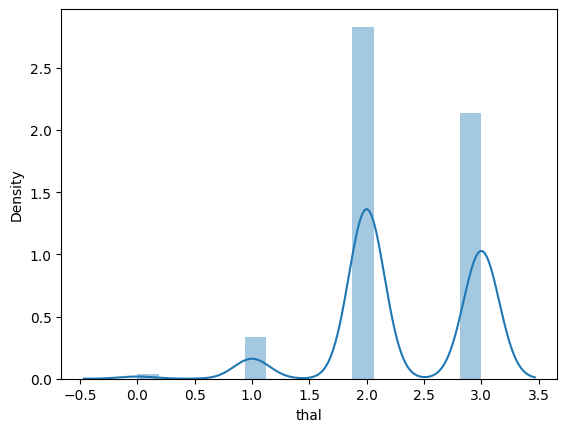

In [38]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [40]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [41]:
X_train.shape

(820, 13)

In [42]:
X_test.shape

(205, 13)

In [43]:
Y_train.shape

(820,)

In [44]:
Y_test.shape

(205,)

## V. Model Fitting

In [45]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [47]:
Y_pred_lr.shape

(205,)

In [48]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


### Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [50]:
Y_pred_nb.shape

(205,)

In [51]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


### SVM

In [52]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [53]:
Y_pred_svm.shape

(205,)

In [54]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


### K Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [56]:
Y_pred_knn.shape

(205,)

In [57]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [59]:
print(Y_pred_dt.shape)

(205,)


In [60]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


### Random Forest

In [5]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you already have your X_train, X_test, Y_train, and Y_test data prepared

# Training the model and finding the best random state
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Final model with the best random state
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print(f"Model saved with accuracy: {max_accuracy}%")


Model saved with accuracy: 100.0%


In [82]:
Y_pred_rf.shape

(205,)

In [83]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667
Standard deviation: 0.0211


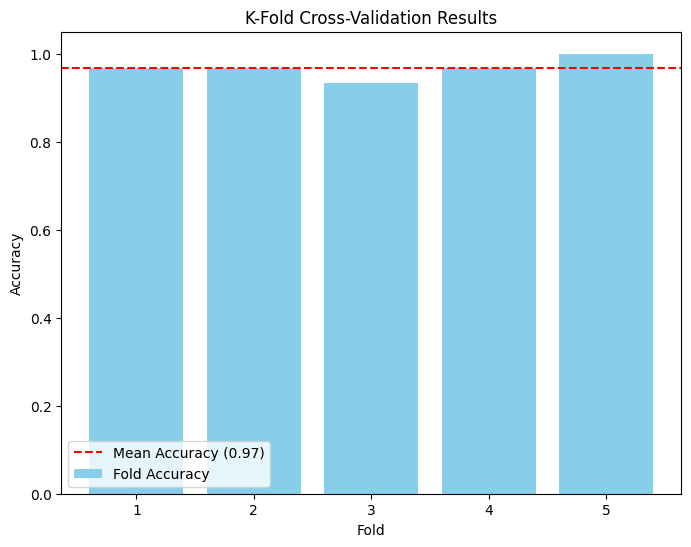

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris  # Example dataset

# Step 1: Load the dataset (use your own dataset here)
X, y = load_iris(return_X_y=True)

# Step 2: Define the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Perform K-fold cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5)

# Step 4: Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Step 5: Print mean and standard deviation of the scores
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Step 6: Plotting the cross-validation results
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', label='Fold Accuracy')

# Add a line for the mean accuracy
mean_accuracy = cv_scores.mean()
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy ({mean_accuracy:.2f})')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Results')
plt.xticks(range(1, len(cv_scores) + 1))  # Label the x-axis with fold numbers
plt.legend()

# Show the plot
plt.show()


### XGBoost

In [84]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [66]:
Y_pred_xgb.shape

(205,)

In [67]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


### Neural Network

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [71]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5209 - loss: 78.3483   
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4981 - loss: 65.6426 
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5106 - loss: 49.1556 
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4849 - loss: 38.7120 
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5244 - loss: 26.2632 
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5080 - loss: 18.0442 
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4899 - loss: 10.0245 
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4609 - loss: 4.0726 
Epoch 9/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 1.6491 
Epoch 10/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4403 - loss: 1.3264 
Epoch 11/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4278 - loss: 0.9800 
Epoch 12/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [73]:
Y_pred_nn = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [74]:
Y_pred_nn.shape

(205, 1)

In [75]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [76]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 52.2 %


## VI. Output final score

In [77]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 52.2 %


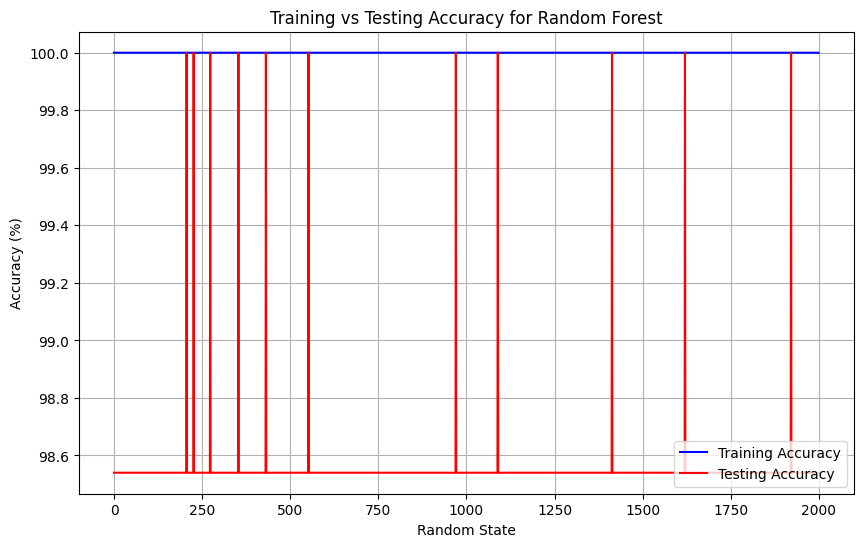

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv("heart1.csv")

# Define predictors (X) and target (Y)
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Lists to store accuracy values for training and testing
train_accuracies = []
test_accuracies = []

# Train and evaluate the model with different random states
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)  # Train on the training data
    
    # Predict on both training and testing data
    Y_pred_train = rf.predict(X_train)
    Y_pred_test = rf.predict(X_test)
    
    # Calculate accuracy for both training and testing data
    train_accuracy = round(accuracy_score(Y_pred_train, Y_train) * 100, 2)
    test_accuracy = round(accuracy_score(Y_pred_test, Y_test) * 100, 2)
    
    # Store the accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the Training vs Testing Accuracy
plt.figure(figsize=(10, 6))

# Plot the training and testing accuracies
plt.plot(range(2000), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(2000), test_accuracies, label='Testing Accuracy', color='red')

# Add labels and title
plt.title('Training vs Testing Accuracy for Random Forest')
plt.xlabel('Random State')
plt.ylabel('Accuracy (%)')
plt.legend(loc='lower right')

# Show grid for better visibility
plt.grid(True)

# Show the plot
plt.show()  # This should be the last statement in this code block.


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

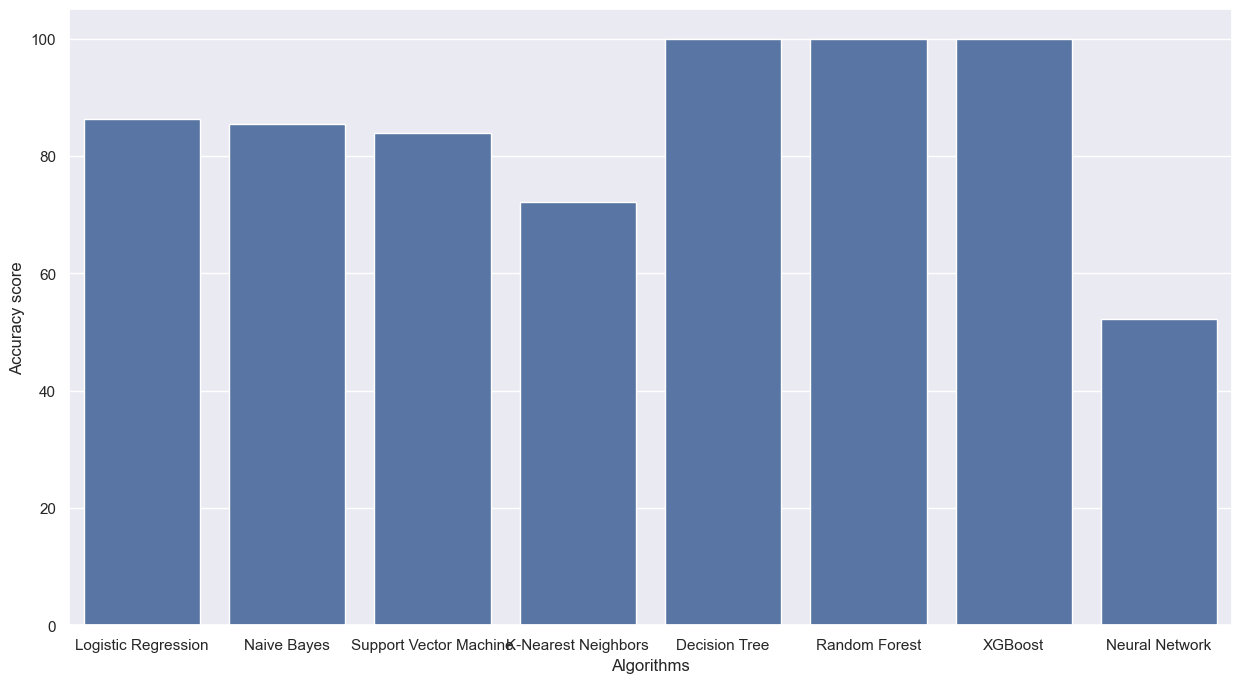

In [78]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Pass the arguments as keyword arguments
sns.barplot(x=algorithms, y=scores)
